<a href="https://colab.research.google.com/github/luizeduardo7/luizeduardo7/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Alunos**: 

            Gabriel Martins Silva
            Luiz Eduardo Jacó Andrade

**Matricula**

**Turma**: 10A, 14A

Link do repositório GitHub: https://github.com/luizeduardo7/luizeduardo7/blob/f9254958144df6dffdf7e6e8cea62825f59e8a4f/EFC1_GCC_253.ipynb

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 26 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [248]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math

global tempo_exec_merge
tempo_exec_merge = 0

global tempo_exec_heap
tempo_exec_heap = 0

global tempo_exec_quick
tempo_exec_quick = 0

In [137]:
def gera_arr(n_elem):
  a = np.random.randint(5, 1000, n_elem)
  return a

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



In [314]:
def casoInsert():
  melhor = []
  pior = []
  medio = []
  elem = np.arange(0, 200) 
    
  for i in np.arange(5, 1001, 5):
    arr = gera_arr(i)

    arr, tempo, cont3 = insertionSort(arr)
    medio.append(tempo)

    arr, tempo, cont1 = insertionSort(arr)
    melhor.append(tempo)

    arr = arr[::-1]
    arr, tempo, cont2 = insertionSort(arr)
    pior.append(tempo)

  plt.plot(elem, melhor, label='melhor caso | %s comparações' %cont1)  # Plot some data on the (implicit) axes.
  plt.plot(elem, pior, label='pior caso | %s comparações' %cont2)  # etc.
  plt.plot(elem, medio, label='caso médio | %s comparações' %cont3)  # etc.
  plt.ylabel('Quatidade de elementos')
  plt.ylabel('Tempo de execução em s')
  plt.title("Insertion Sort")
  plt.legend()

##  Insertion Sort


In [309]:
def insertionSort(arr):
  cont = 1;
  ini = time.time()
  for j in range(1, len(arr)):
    cont += 1
    chave = arr[j]
    i = j-1
    while i >= 0 and arr[i] > chave:
      cont += 1
      arr[i+1] = arr[i]
      i -= 1
    arr[i+1] = chave
  fim = time.time()
  tempo_exec = fim - ini
  
  return arr, tempo_exec, cont

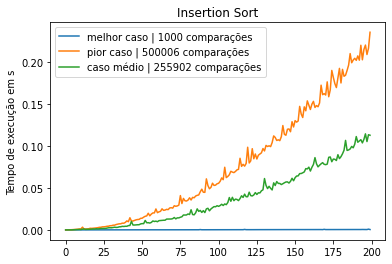

In [315]:
casoInsert()

##  Merge Sort


In [180]:
def casoMerge():
  melhor = []
  pior = []
  elem = np.arange(0, 200) 
    
  for i in np.arange(5, 1001, 5):
    arr = gera_arr(i)

    arr, tempo = mergeSort(arr, 0, len(arr)-1)
    melhor.append(tempo)

    arr2 = [1]
    arr2, tempo = mergeSort(arr, 0, len(arr2)-1)
    pior.append(tempo)

  plt.plot(elem, melhor, label='melhor caso')  # Plot some data on the (implicit) axes.
  plt.plot(elem, pior, label='pior caso')  # etc.
  plt.ylabel('Quatidade de elementos')
  plt.ylabel('Tempo de execução em s')
  plt.title("Merge Sort")
  plt.legend()

In [158]:
def merge(arr, p, q, r):
  n1 = q - p + 1
  n2 = r - q
  L = []
  R = []
  for i in range(0, n1):
    L.append(arr[p+i])
  for j in range(0,  n2):
    R.append(arr[q+j+1])

  i = 0
  j = 0
  k = p
  while i < n1 and j < n2:
      if L[i] <= R[j]:
        arr[k] = L[i]
        i += 1
      else:
        arr[k] = R[j]
        j += 1
      k += 1
  while i < n1:
    arr[k] = L[i]
    i += 1
    k += 1
  while j < n2:
    arr[k] = R[j]
    j += 1
    k += 1

In [173]:
def mergeSort(arr, p, r):
  ini = time.time()
  if p < r:
    q = (p+r)//2

    mergeSort(arr, p, q)
    mergeSort(arr, q+1, r)
    merge(arr, p, q, r)
  fim = time.time()
  global tempo_exec_merge
  tempo_exec_merge += fim - ini
  return arr, tempo_exec_merge


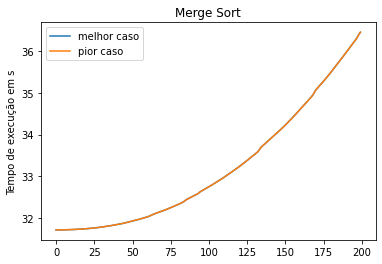

In [181]:
casoMerge()

##  Selection Sort


In [206]:
def casoSelection():
  melhor = []
  pior = []
  medio = []
  elem = np.arange(0, 200) 
    
  for i in np.arange(5, 1001, 5):
    arr = gera_arr(i)

    tempo = selectionSort(arr, len(arr))
    medio.append(tempo)

    tempo = selectionSort(arr, len(arr))
    pior.append(tempo)

    arr2 = [1]
    tempo = selectionSort(arr2, len(arr2))
    melhor.append(tempo)

  plt.plot(elem, melhor, label='melhor caso')  # Plot some data on the (implicit) axes.
  plt.plot(elem, pior, label='pior caso')  # etc.
  plt.plot(elem, medio, label='caso médio')  # etc.
  plt.ylabel('Quatidade de elementos')
  plt.ylabel('Tempo de execução em s')
  plt.title("Selection Sort")
  plt.legend()

In [204]:
def selectionSort(arr, tam):
  ini = time.time()
  for step in range(tam):
    min_idx = step

  for i in range(step + 1, tam):
    if arr[i] < arr[min_idx]:
      min_idx = i
  arr[step], arr[min_idx] = arr[min_idx], arr[step]
  fim = time.time()
  tempo_exec = fim - ini
  return tempo_exec

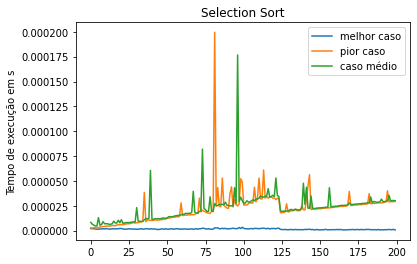

In [207]:
casoSelection()

##  Bubble Sort


In [245]:
def casoBubble():
  melhor = []
  pior = []
  medio = []
  elem = np.arange(0, 200) 
    
  for i in np.arange(5, 1001, 5):
    arr = gera_arr(i)
    
    tempo = bubbleSort(arr)
    medio.append(tempo)

    arr = np.sort(arr)
    tempo = bubbleSort(arr)
    melhor.append(tempo)

    arr = arr[::-1]
    tempo = bubbleSort(arr)
    pior.append(tempo)

  plt.plot(elem, melhor, label='melhor caso')  # Plot some data on the (implicit) axes.
  plt.plot(elem, pior, label='pior caso')  # etc.
  plt.plot(elem, medio, label='caso médio')  # etc.
  plt.ylabel('Quatidade de elementos')
  plt.ylabel('Tempo de execução em s')
  plt.title("Bubble Sort")
  plt.legend()

In [246]:
def bubbleSort(arr):
  ini = time.time()
  n = len(arr)
  swapped = False
  for i in range(n-1):
    for j in range(0, n-i-1):
      if arr[j] > arr[j + 1]:
        swapped = True
        arr[j], arr[j + 1] = arr[j + 1], arr[j]
    if not swapped:
      return
  fim = time.time()
  tempo_exec = fim - ini
  return tempo_exec

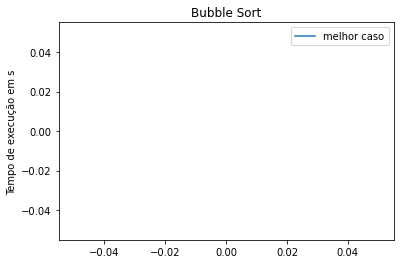

In [280]:
casoBubble()

## Heap Sort

In [261]:
def casoHeap():
  melhor = []
  pior = []
  medio = []
  elem = np.arange(0, 200) 
    
  for i in np.arange(5, 1001, 5):
    arr = gera_arr(i)

    tempo = heapSort(arr)
    medio.append(tempo)

    tempo = heapSort(arr)
    pior.append(tempo)

    arr2 = [1]
    tempo = heapSort(arr2)
    melhor.append(tempo)

  plt.plot(elem, melhor, label='melhor caso')  # Plot some data on the (implicit) axes.
  plt.plot(elem, pior, label='pior caso')  # etc.
  plt.plot(elem, medio, label='caso médio')  # etc.
  plt.ylabel('Quatidade de elementos')
  plt.ylabel('Tempo de execução em s')
  plt.title("Heap Sort")
  plt.legend()

In [249]:
def left(i):
  return 2*i + 1

def right(i):
  return (2*i) + 2

In [250]:
def maxHeaPify(arr, n, i):
  l = left(i)
  r = right(i)
  maior = i

  if l < n and arr[l] > arr[i]:
    maior = l
  
  if r < n and arr[r] > arr[maior]:
    maior = r

  if maior != i:
    arr[i], arr[maior] = arr[maior], arr[i]
    maxHeaPify(arr, n, maior)

In [262]:
def heapSort(arr):
  ini = time.time()
  n = len(arr)

  for i in range(n // 2 - 1, -1, -1): 
    maxHeaPify(arr, n, i) 
    
  for i in range(n-1, 0, -1): 
    arr[i], arr[0] = arr[0], arr[i]
    maxHeaPify(arr, i, 0)
  fim = time.time()
  global tempo_exec_heap
  tempo_exec_heap += fim - ini
  return tempo_exec_heap

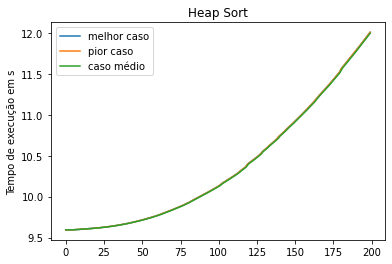

In [263]:
casoHeap()

## Quick Sort

> pivo = *A[A-comprimento]*

In [302]:
def casoQuick():
  melhor = []
  #pior = []
  elem = np.arange(0, 200) 
    
  for i in np.arange(5, 1001, 5):
    arr = gera_arr(i)

    arr = np.sort(arr)
    #tempo = quicksort(0, len(arr)-1, arr)
    #pior.append(tempo)

    arr = arr[::-1]
    tempo = quicksort(0, len(arr)-1, arr)
    melhor.append(tempo)

  plt.plot(elem, melhor, label='melhor caso')  # Plot some data on the (implicit) axes.
  #plt.plot(elem, pior, label='pior caso')  # etc.
  plt.ylabel('Quatidade de elementos')
  plt.ylabel('Tempo de execução em s')
  plt.title("Quick Sort")
  plt.legend()

In [281]:
def partition(l, r, arr):
  pivo, ptr = arr[r], l
  for i in range(l, r):
    if arr[i] <= pivo:
      arr[i], arr[ptr] = arr[ptr], arr[i]
      ptr += 1
  arr[ptr], arr[r] = arr[r], arr[ptr]
  return ptr

In [303]:
def quicksort(l, r, arr):
  ini = time.time()
  if len(arr) == 1:
    return arr
  if l < r:
    pi = partition(l, r, arr)
    quicksort(l, pi-1, arr)  
    quicksort(pi+1, r, arr)
  fim = time.time()
  global tempo_exec_quick
  tempo_exec_quick += fim - ini
  return tempo_exec_quick

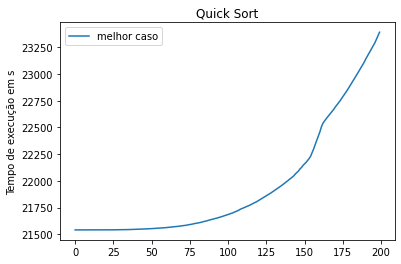

In [304]:
casoQuick()

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



##Questão 1.a)

In [ ]:
casoInsert()

In [ ]:
casoBubble()

In [ ]:
casoSelection()

In [ ]:
casoHeap()

In [ ]:
casoQuick()

In [ ]:
casoMerge()